<a href="https://colab.research.google.com/github/seoulartgirl/GithubPortfolio/blob/main/%E1%84%83%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A5%E1%84%82%E1%85%B5%E1%86%BC08_CNN_05_%E1%84%89%E1%85%B5%E1%84%80%E1%85%A1%E1%86%A8%E1%84%92%E1%85%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 시각화

- 필터 가중치 시각화
- 특성 맵 시각화

In [ ]:
# 라이브러리 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random

# 랜덤 시드 고정
SEED=12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

## 예제. Fashion MNist 데이터

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras.utils import plot_model

#### 데이터 준비

In [ ]:
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

X_tr, X_val, y_tr, y_val = train_test_split(train_scaled, train_target,
                                            test_size=0.2,
                                            random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
def draw_loss_val_plot(history):
    loss = ['loss','val_loss']
    acc = ['accuracy', 'val_accuracy']
    title = ['Loss', 'Accuracy']
    plt.figure(figsize=(10,5))
    for i, item in enumerate([loss, acc]):
        n = len(history.history[item[0]])
        plt.subplot(1,2,i+1)
        plt.plot(history.history[item[0]], label='trian')
        plt.plot(history.history[item[1]], label='validation')
        plt.xlabel('epoch')
        plt.ylabel(title[i])
        # plt.xticks(range(n), range(1, n+1))
        plt.title(title[i] + ' plot')
        plt.legend()
    plt.show()

#### 모델 정의

In [ ]:
# def build_cnn_model():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=3, activation='relu',
#                      padding='same', input_shape=(28,28,1)))
#     model.add(MaxPooling2D(2))
#     model.add(Conv2D(64, kernel_size=(3,3), activation='relu',
#                      padding='same'))
#     model.add(MaxPooling2D(2))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(10, activation='softmax'))

#     return model

In [ ]:
def build_cnn_model():
    inputs = keras.layers.Input(shape=(28,28,1))
    x = Conv2D(32, kernel_size=3, activation='relu',
                     padding='same', input_shape=(28,28,1))(inputs)
    x = MaxPooling2D(2)(x)
    x = Conv2D(64, kernel_size=(3,3), activation='relu',
                     padding='same')(x)
    x = MaxPooling2D(2)(x)
    x = Flatten()(x)
    x = Dense(100, activation='relu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model

In [ ]:
model_cnn = build_cnn_model()

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

checkpt_cnn = ModelCheckpoint('model/fashion-best-cnn-model.keras')
early_stop_cnn = EarlyStopping(patience=2,
                               restore_best_weights=True)
history_cnn = model_cnn.fit(X_tr, y_tr, epochs=20, verbose=0,
                            validation_data=(X_val, y_val),
                            callbacks=[checkpt_cnn, early_stop_cnn])

#### 손실 검증

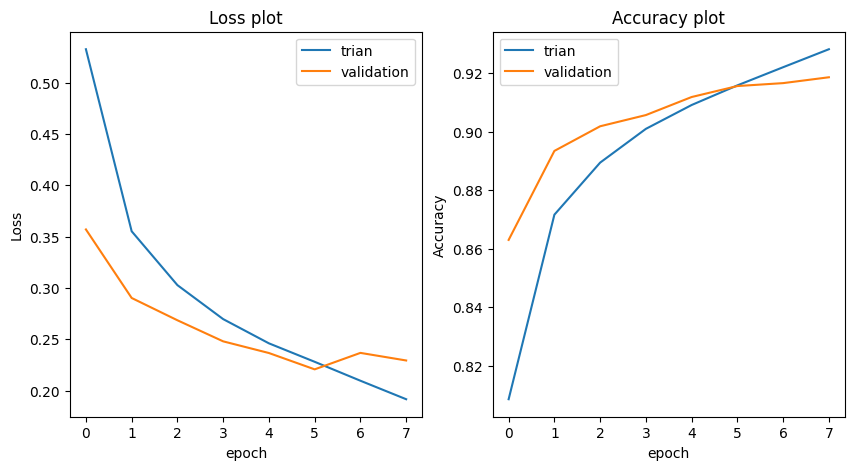

epoch=8일 때
loss=0.1917,accuracy=0.9282
val_loss=0.2294,val_accuracy=0.9186


In [ ]:
draw_loss_val_plot(history_cnn)
stopped_epoch = early_stop_cnn.stopped_epoch
print(f'epoch={stopped_epoch+1}일 때')
print(f"loss={history_cnn.history['loss'][-1]:.4f},\
accuracy={history_cnn.history['accuracy'][-1]:.4f}")
print(f"val_loss={history_cnn.history['val_loss'][-1]:.4f},\
val_accuracy={history_cnn.history['val_accuracy'][-1]:.4f}")

## CNN 시각화

- 필터 가중치 시각화
- 특성 맵 시각화

### 필터 가중치 시각화

In [ ]:
model_cnn

In [ ]:
model_cnn.layers

#### 첫번째 합성곱 층의 가중치 시각화

In [ ]:
conv1 = model_cnn.layers[0] #Conv 2D
print(f'가중치의 크기 : {conv1.weights[0].shape}, 절편의 크기: {conv1.weights[1].shape}')

가중치의 크기 : (3, 3, 1, 32), 절편의 크기: (32,)


In [ ]:
# 텐서 형식의 가중치를 numpy로 변환
conv1_weights = conv1.weights[0].numpy()
conv1_weights.shape

(3, 3, 1, 32)

In [ ]:
conv1_weights[0]

array([[[-0.9365337 ,  0.02912908, -0.14161994, -0.08022366,
          0.15121849, -0.15446793,  0.09722795,  0.13311055,
         -0.20173442, -0.19009101,  0.11335912,  0.00929672,
          0.18431133, -0.12514997,  0.00653924, -0.09783697,
         -0.19128078, -0.14905073, -0.34396496, -0.12928301,
         -0.05913864, -0.20645453, -0.18701498, -0.67063504,
         -0.01706808, -0.24160984,  0.12755066,  0.4097881 ,
          0.32052085, -0.22644497, -0.198498  ,  0.27207115]],

       [[-0.11736637, -0.25151303, -0.1177655 , -0.41960272,
          0.22539648,  0.00786695,  0.22165333,  0.08509522,
          0.25073004,  0.05184801,  0.25988597,  0.00562726,
          0.07213057,  0.12108625, -0.34959298,  0.08302392,
         -0.17288846, -0.0660207 ,  0.24681781, -0.0149259 ,
          0.22323722, -0.08984956, -0.02436625, -1.047643  ,
          0.11697174,  0.21683975,  0.09550573, -0.00723809,
         -0.22888392,  0.10799932,  0.20071566, -0.19271475]],

       [[ 0.277027

In [ ]:
conv1_weights.mean(), conv1_weights.std()

(-0.013956805, 0.21421826)

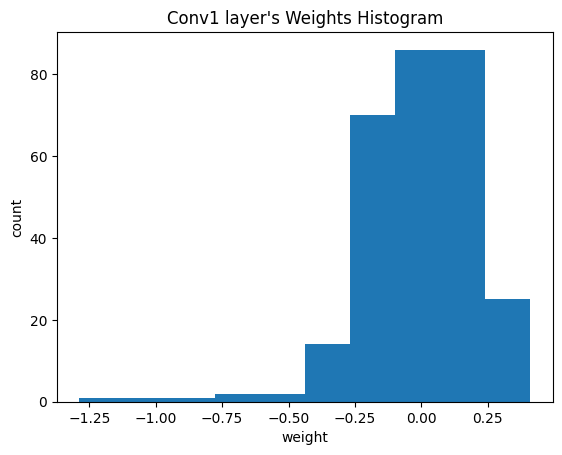

In [ ]:
plt.hist(conv1_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.title("Conv1 layer's Weights Histogram")
plt.show()

# batch normalization을 통해 정규화

- 첫번째 Conv 층의 필터들을 시각화

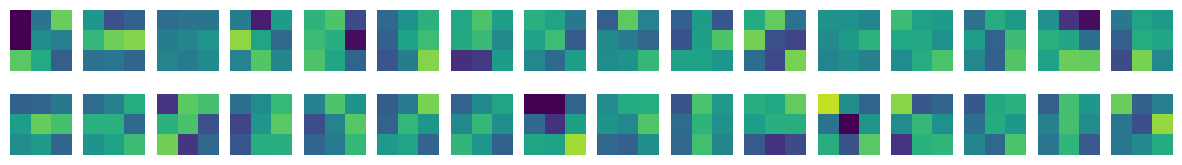

In [ ]:
plt.figure(figsize=(15, 2))
for i in range(32):
    plt.subplot(2, 16, i+1)
    plt.imshow(conv1_weights[:,:,:,i], vmin=-0.5, vmax=0.5)
    plt.axis('off')
plt.show()

#### 훈련하지 않는 빈 합성곱 신경망의 필터 시각화

In [ ]:
no_model_cnn = build_cnn_model()
no_model_cnn.layers

In [ ]:
no_conv1 = no_model_cnn.layers[0]
no_conv1.weights[0].shape

TensorShape([3, 3, 1, 32])

In [ ]:
no_conv1_weights = no_conv1.weights[0].numpy()
no_conv1_weights.shape

(3, 3, 1, 32)

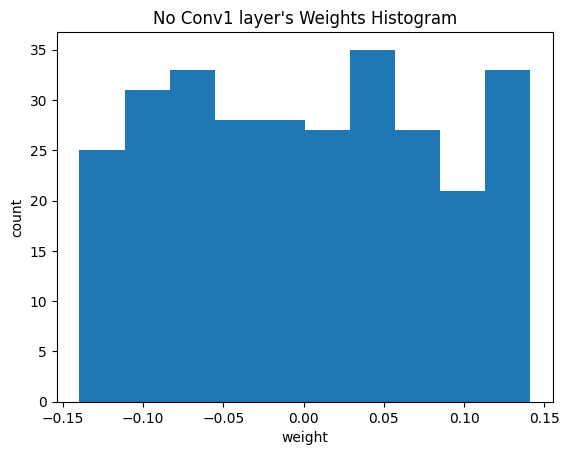

In [ ]:
plt.hist(no_conv1_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.title("No Conv1 layer's Weights Histogram")
plt.show()

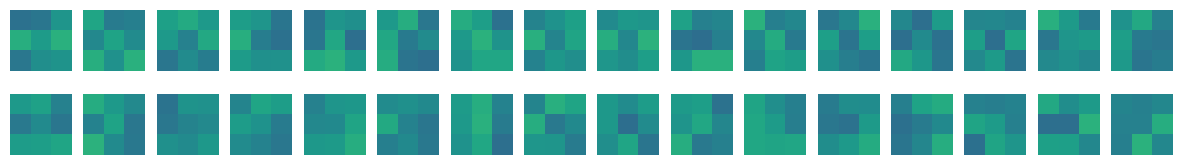

In [ ]:
plt.figure(figsize=(15, 2))
for i in range(32):
    plt.subplot(2, 16, i+1)
    plt.imshow(no_conv1_weights[:,:,:,i], vmin=-0.5, vmax=0.5)
    plt.axis('off')
plt.show()

In [ ]:
def draw_filter_weights(model, layer=0):
    conv = no_model_cnn.layers[layer]
    weights = conv.weights[0].numpy()
    filter_n = weights.shape[-1]
    plt.figure(figsize=(15, 2))
    for i in range(32):
        plt.subplot(2, 16, i+1)
        plt.imshow(no_conv1_weights[:,:,:,i], vmin=-0.5, vmax=0.5)
        plt.axis('off')
    plt.show()

In [ ]:
# conv2 = model_cnn.layers[2]
# weights2 = conv2.weights[0].numpy()
# print(weights2.shape)
# plt.figure(figsize=(15, 2))
# for i in range(64):
#     plt.subplot(4, 8, i+1)
#     plt.imshow(no_conv1_weights[:,:,:,i], vmin=-0.5, vmax=0.5)
#     plt.axis('off')
# plt.show()

### 신경망 모델 구성을 위한 함수형 API

In [ ]:
inputs = keras.Input(shape=(28,28,1))
x = Conv2D(32, kernel_size=3, activation='relu',
                 padding='same', input_shape=(28,28,1))(inputs)
x = MaxPooling2D(2)(x)
x = Conv2D(64, kernel_size=(3,3), activation='relu',
                 padding='same')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.4)(x)
outputs = Dense(10, activation='softmax')(x)
model = keras.Model(inputs, outputs)

### 특성맵 시각화

In [ ]:
model_cnn.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_2_input')>

In [ ]:
model_cnn.layers[0].output #첫번째 층의 output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d_2')>

In [ ]:
conv_acti_1 = keras.Model(inputs=model_cnn.input,
                          outputs=model_cnn.layers[0].output)

- 첫번째 샘플을 conv_acti_1의 predict() 메서드에 전달하여 특성맵을 확인

In [ ]:
inputs = train_scaled[1].reshape(-1, 28, 28, 1)
feature_maps = conv_acti_1.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 24ms/step
(1, 28, 28, 32)


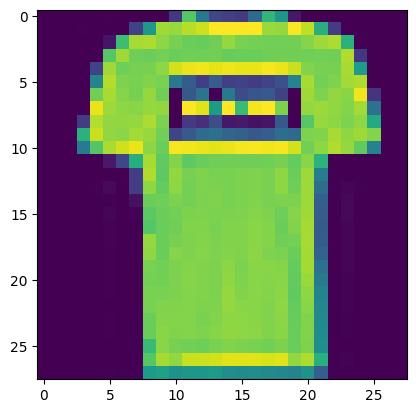

In [ ]:
plt.imshow(train_scaled[1])
plt.show()

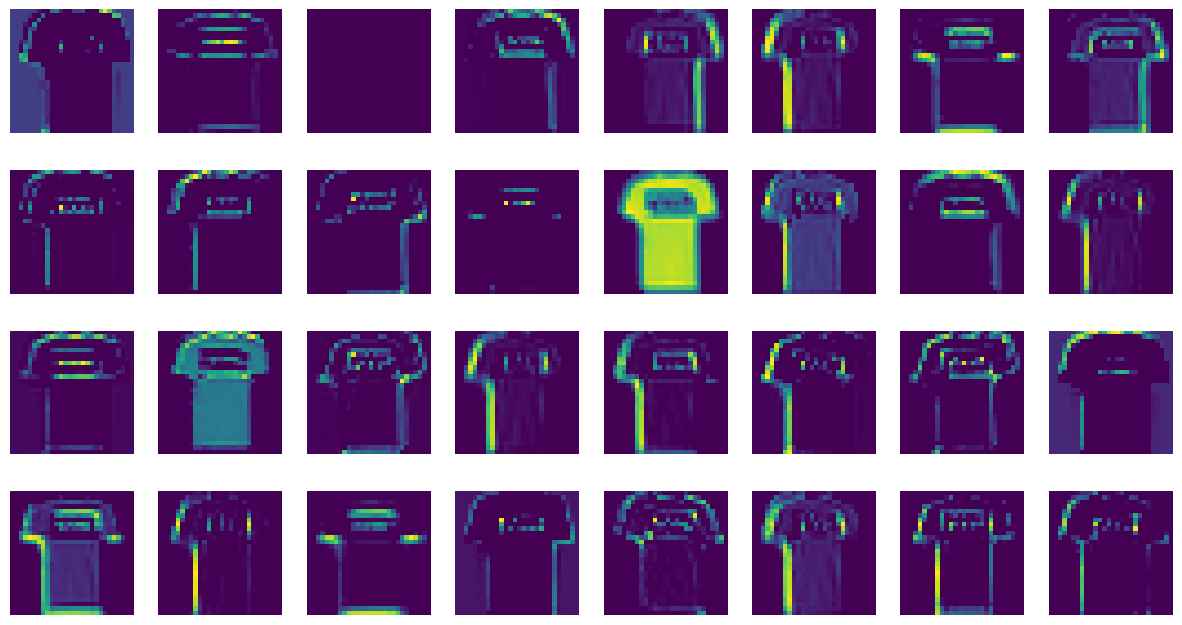

In [ ]:
plt.figure(figsize=(15,8))
for i in range(32):
    plt.subplot(4,8, i+1)
    plt.imshow(feature_maps[0,:,:,i])
    plt.axis('off')
plt.show()

In [ ]:
inputs = train_scaled[0].reshape(-1, 28, 28, 1)
conv_acti_2 = keras.Model(model_cnn.input, model_cnn.layers[2].output)
feature_maps2 = conv_acti_2.predict(inputs)
feature_maps2.shape

1/1 [==============================] - 0s 333ms/step


(1, 14, 14, 64)

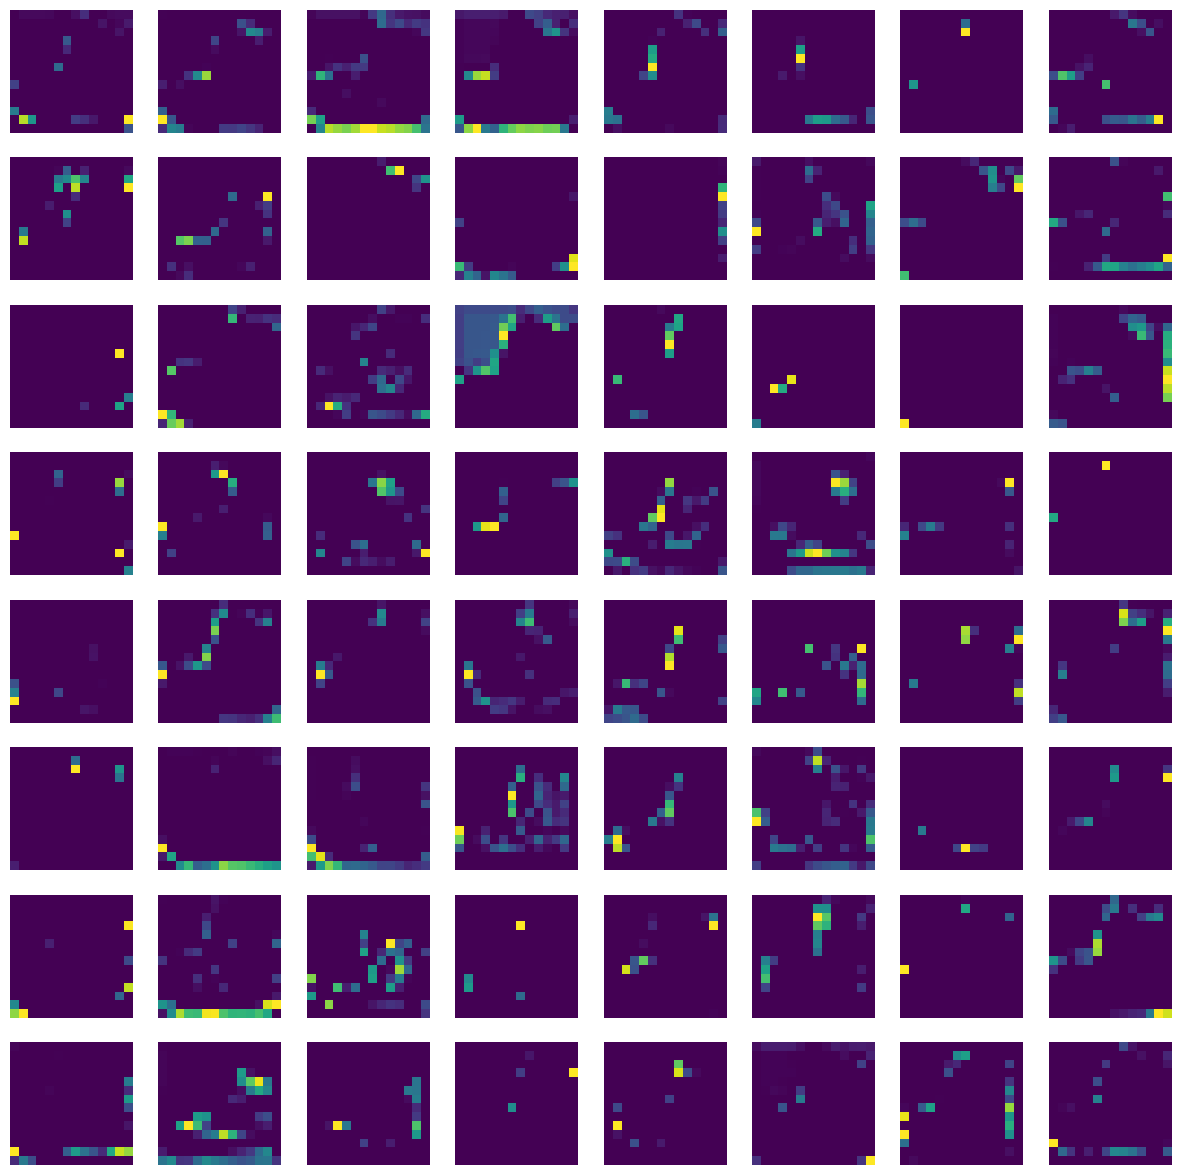

In [ ]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8, i+1)
    plt.imshow(feature_maps2[0,:,:,i])
    plt.axis('off')
plt.show()

- 가중치 시각화

#### 두번째 샘플을 conv_acti_2의 predict() 메서드에 전달하여 특성맵을 확인

In [ ]:
conv_acti_2 = keras.Model(model_cnn.input, model_cnn.layers[3].output)
input1 = train_scaled[1].reshape(-1, 28, 28, 1)
feature_maps2 = conv_acti_2.predict(input1)
feature_maps2.shape

1/1 [==============================] - 0s 93ms/step


(1, 7, 7, 64)

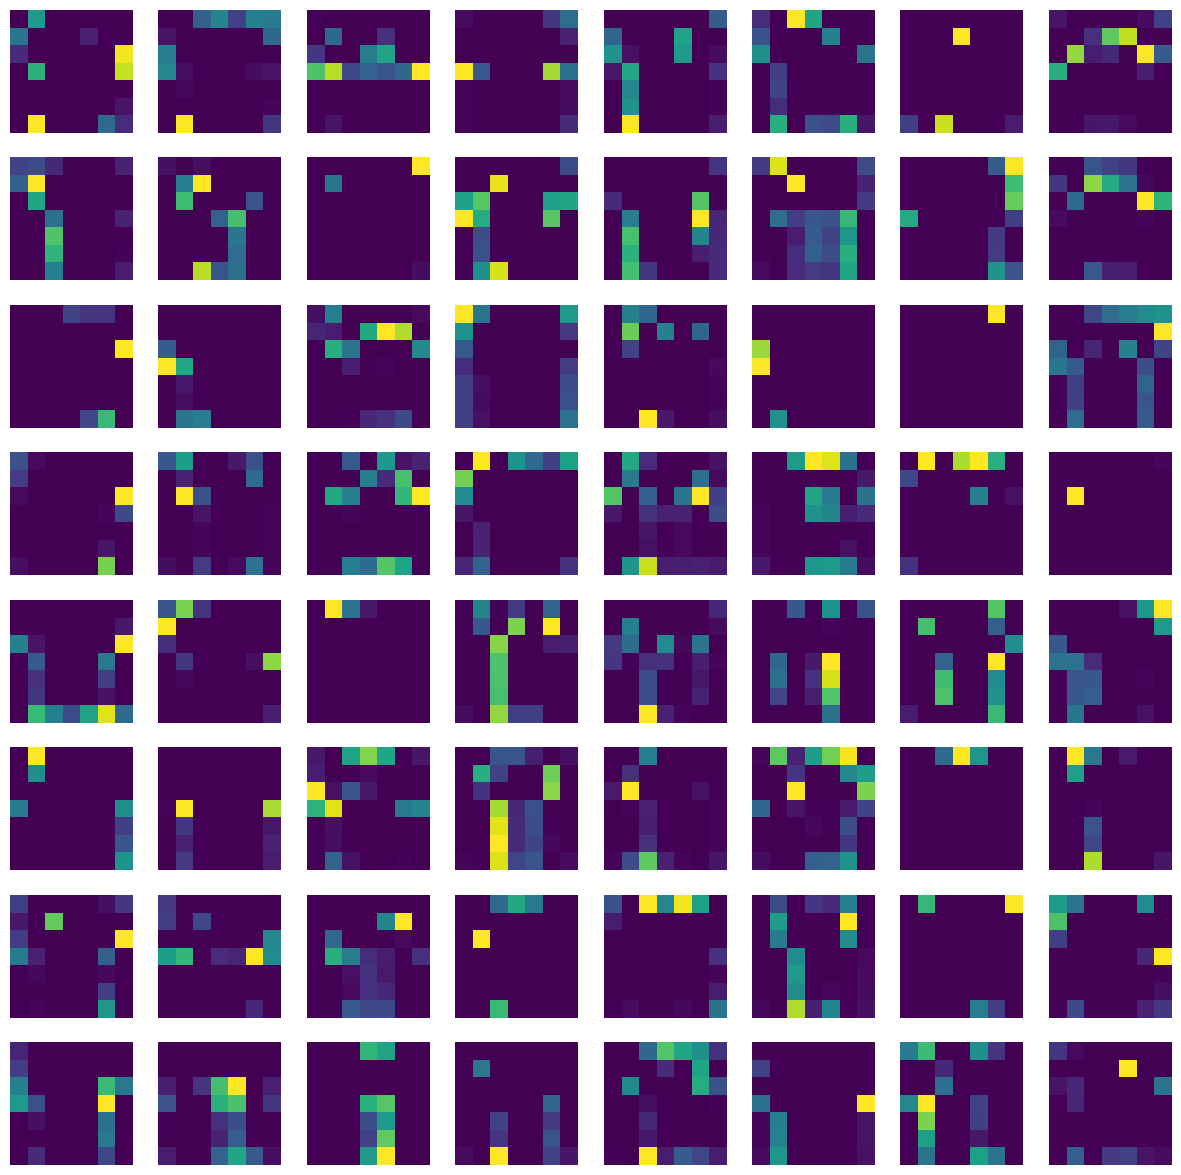

In [ ]:
plt.figure(figsize=(15,15))
for i in range(64):
    plt.subplot(8,8, i+1)
    plt.imshow(feature_maps2[0,:,:,i])
    plt.axis('off')
plt.show()

=> 합성곱 신경망의 앞부분 합성곱 층은 이미지의 시각적 정보를 감지하며, 뒤쪽의 합성곱층은 앞쪽에서 감지한 정보를 바탕으로 추상적인 정보를 학습함

-----